In [1]:
from numpy import *
import matplotlib.pyplot as plt

In [4]:
# Range of time (unit: year)
t = arange(0, 650, 1)
time = arange(2000, 2000 + len(t))
# Range of age (unit: year)
age = arange(1, 1001)
# Concentration of CO2
X_at = [1715 * exp(0.0305 * ti) / (1715 + exp(0.0305 * ti) - 1) + 284 for ti in t]
# Global annual mean temperature
sigma = 4.5
Ts = [15 + (sigma / log(2)) * log(Xa / 285)
      for Xa in X_at]

############# Input #############
x = 0.65
Gamma_Ts = [42.7 + 1.68 * (T - 25) + 0.012 * (T - 25) ** 2 for T in Ts]
Beta_X_Ts = [(3 * x * Xa * Gamma) / ((x * Xa - Gamma) * (x * Xa + 2 * Gamma)) for Xa, Gamma in zip(X_at, Gamma_Ts)]
s0 = 300 # Input at initial time
# Input
S1 = [s0 * (1 + 2.14 * Beta * log(Xa / 285)) for Beta, Xa in zip(Beta_X_Ts, X_at)]
# Temperature scale
Var = [2 ** (0.1 * new - 1.5) for new in Ts]

In [2]:
list_b11 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/para_b11.npy')
list_b22 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/para_b22.npy')
list_b33 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/para_b33.npy')
list_cue_rMM = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/list_CUE_rMM.npy')
list_ub_rMM = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/list_U_B_rMM.npy')
list_vs_rMM = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/list_V_S_rMM.npy')
list_cue_MM = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/list_EPI_MM.npy')
list_ub_MM = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/list_U_B_MM.npy')
list_vs_MM = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/list_V_S_MM.npy')



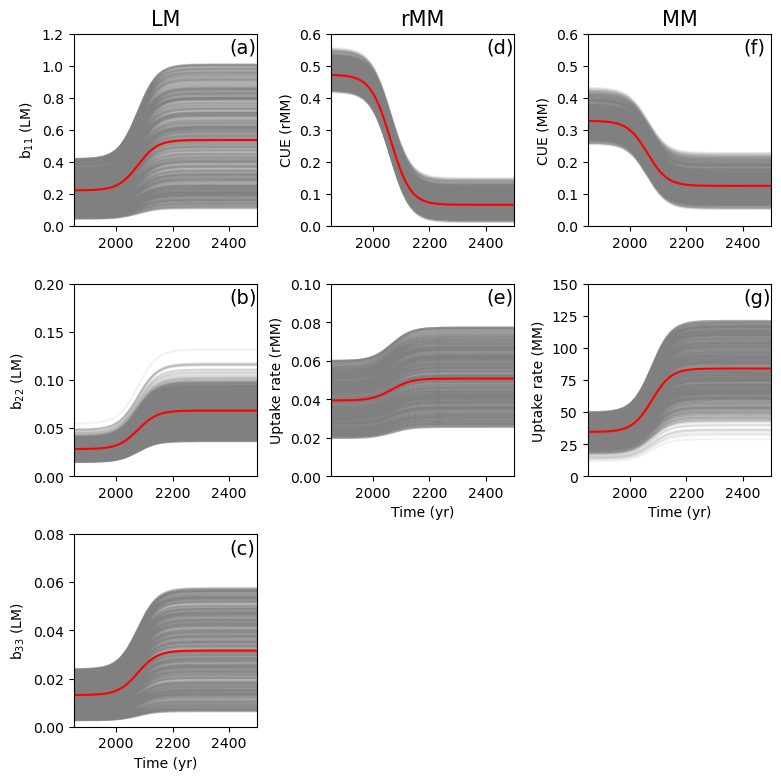

In [6]:
fig = plt.figure(figsize=(9,9))

######################################## subplot 1
ax1 = fig.add_subplot(3,3,1)
ax1.set_title('LM', fontsize=15)
ax1.set_ylabel('b$_{11}$ (LM)')
arr_var = array(Var)
for i in list_b11:
    ax1.plot(arange(1850, 2500), -i*arr_var, color='gray', alpha=0.1)
ax1.plot(arange(1850, 2500), -list_b11.mean()*arr_var, color='r')
ax1.set_xlim(1850, 2500)
ax1.set_ylim(0,1.2)
ax1.text(0.85,0.9, '(a)', fontsize=14, transform=ax1.transAxes)

######################################## subplot 4
ax4 = fig.add_subplot(3,3,4)
ax4.set_ylabel('b$_{22}$ (LM)')
arr_var = array(Var)
for i in list_b22:
    ax4.plot(arange(1850, 2500), -i*arr_var, color='gray', alpha=0.1)
ax4.plot(arange(1850, 2500), -list_b22.mean()*arr_var, color='r')
ax4.set_xlim(1850, 2500)
ax4.set_ylim(0,0.2)
ax4.text(0.85,0.9, '(b)', fontsize=14, transform=ax4.transAxes)

######################################## subplot 7
ax7 = fig.add_subplot(3,3,7)
ax7.set_ylabel('b$_{33}$ (LM)')
ax7.set_xlabel('Time (yr)')
arr_var = array(Var)
for i in list_b33:
    ax7.plot(arange(1850, 2500), -i*arr_var, color='gray', alpha=0.1)
ax7.plot(arange(1850, 2500), -list_b33.mean()*arr_var, color='r')
ax7.set_xlim(1850, 2500)
ax7.set_ylim(0,0.08)
ax7.text(0.85,0.9, '(c)', fontsize=14, transform=ax7.transAxes)

######################################## subplot 2
ax2 = fig.add_subplot(3,3,2)
ax2.set_title('rMM', fontsize=15)
ax2.set_ylabel('CUE (rMM)')
for c in list_cue_rMM:
    list_cue = [c - 0.032 * (T - 15) for T in Ts]
    ax2.plot(arange(1850, 2500), list_cue, color='gray', alpha=0.1)
ax2.plot(arange(1850, 2500), [list_cue_rMM.mean()- 0.032 * (T - 15) for T in Ts], color='r')
ax2.set_xlim(1850, 2500)
ax2.set_ylim(0,0.6)
ax2.text(0.85,0.9, '(d)', fontsize=14, transform=ax2.transAxes)

######################################## subplot 5
ax5 = fig.add_subplot(3,3,5)
ax5.set_ylabel('Uptake rate (rMM)')
ax5.set_xlabel('Time (yr)')
for c in list_vs_rMM:
    list_vs = [c * exp(0.02 * (T - 15)) for T in Ts]
    ax5.plot(arange(1850, 2500), list_vs, color='gray', alpha=0.1)
ax5.plot(arange(1850, 2500), [list_vs_rMM.mean()* exp(0.02 * (T - 15)) for T in Ts], color='r')
ax5.set_xlim(1850, 2500)
ax5.set_ylim(0,0.1)
ax5.text(0.85,0.9, '(e)', fontsize=14, transform=ax5.transAxes)

######################################## subplot 3
ax3 = fig.add_subplot(3,3,3)
ax3.set_title('MM', fontsize=15)
ax3.set_ylabel('CUE (MM)')
for c in list_cue_MM:
    list_cue = [c - 0.016 * (T - 15) for T in Ts]
    ax3.plot(arange(1850, 2500), list_cue, color='gray', alpha=0.1)
ax3.plot(arange(1850, 2500), [list_cue_MM.mean()- 0.016 * (T - 15) for T in Ts], color='r')
ax3.set_xlim(1850, 2500)
ax3.set_ylim(0,0.6)
ax3.text(0.85,0.9, '(f)', fontsize=14, transform=ax3.transAxes)

######################################## subplot 6
ax6 = fig.add_subplot(3,3,6)
ax6.set_ylabel('Uptake rate (MM)')
ax6.set_xlabel('Time (yr)')
for c in list_vs_MM:
    list_vs = [c * exp(0.07 * (T - 15)) for T in Ts]
    ax6.plot(arange(1850, 2500), list_vs, color='gray', alpha=0.1)
ax6.plot(arange(1850, 2500), [list_vs_MM.mean()* exp(0.07 * (T - 15)) for T in Ts], color='r')
ax6.set_xlim(1850, 2500)
ax6.set_ylim(0,150)
ax6.text(0.85,0.9, '(g)', fontsize=14, transform=ax6.transAxes)


plt.subplots_adjust(hspace=0.3, wspace=0.4)

plt.savefig('Figure_S12.png', dpi = 600, bbox_inches='tight')
